In [1]:
import argparse
import numpy as np
import torch
import tqdm
from codebase import utils as ut
from codebase.models.vae import VAE
from codebase.train import train
from pprint import pprint
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
from codebase.utils import *

In [4]:
parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
parser.add_argument('--z',         type=int, default=10,     help="Number of latent dimensions")
parser.add_argument('--iter_max',  type=int, default=20000, help="Number of training iterations")
parser.add_argument('--iter_save', type=int, default=10000, help="Save model every n iterations")
parser.add_argument('--run',       type=int, default=0,     help="Run ID. In case you want to run replicates")
parser.add_argument('--train',     type=int, default=1,     help="Flag for training")
args = parser.parse_known_args()[0]

{'iter_max': 20000, 'iter_save': 10000, 'run': 0, 'train': 1, 'z': 10}
Model name: model=vae_z=10_run=0000


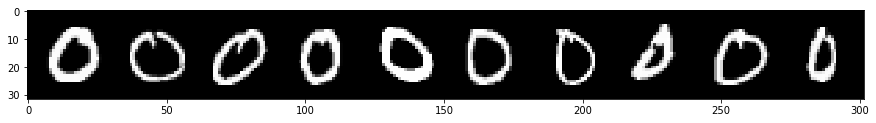

labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


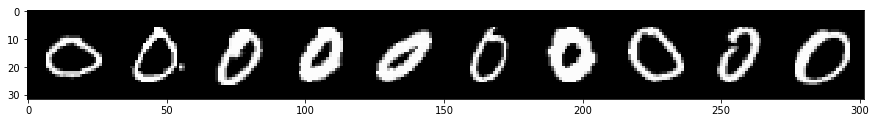

labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


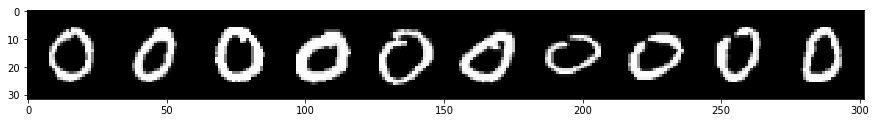

labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


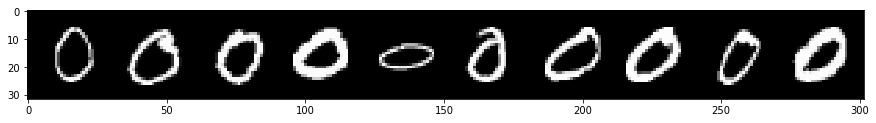

labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


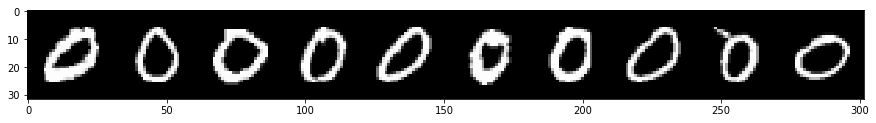

labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([60000, 28, 28])


In [5]:
layout = [
    ('model={:s}',  'vae'),
    ('z={:02d}',  args.z),
    ('run={:04d}', args.run)
]
model_name = '_'.join([t.format(v) for (t, v) in layout])
pprint(vars(args))
print('Model name:', model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_set = datasets.MNIST(
    root='../MNIST-data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

data_set_individual, data_loader_individual = generate_individual_set_loader(train_set)
for i in range(5):
    sample = next(iter(data_loader_individual[0]))
    images, labels = sample
    grid = torchvision.utils.make_grid(images.unsqueeze(dim=1), nrow=10)
    plt.figure(i, figsize=(15,15))
    plt.imshow(np.transpose(grid, (1,2,0)))
    plt.show()
    print('labels:', labels)

train_loader, labeled_subset, _ = ut.get_mnist_data(device, use_test_subset=True)
print(train_loader.dataset.train_data.shape)

In [6]:
sample = next(iter(train_loader))
images, labels = sample

In [7]:
print(images[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,